### 이항 분류(0/1, True/False, 합격/불합격, 생존/사망, 양성/음성) 와인 종류 예측
- Red wine, White wine의 특징을 학습하여 모델 제작후 데이터 입력시 포도주 정류를 판달할 수 있다.

In [48]:
# %autosave 0
import numpy as np
import pandas as pd
import tensorflow
import tensorflow as tf
import time
import os

# tensorflow 2.x에 내장된 Keras 사용
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화
from tensorflow.keras.callbacks import EarlyStopping # 학습 자동 중지

from sklearn.model_selection import train_test_split # 훈련/검증 데이터 분할

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

In [49]:
data = np.loadtxt('./wine.csv', delimiter=",", dtype=np.float64)
print(type(data))
print(data.shape)  # 6497행 13열

<class 'numpy.ndarray'>
(6497, 13)


In [50]:
X = data[:, 0:12]  # 0 ~ 11, 12개의 데이터 변수 추출
print(X.shape)     # 2차원 배열
Y = data[:, 12]    # 13번째 변수, class, 정답
print(Y.shape)     # 1차원 배열

(6497, 12)
(6497,)


In [51]:
df = pd.DataFrame(Y).astype(int) # DataFrame 생성, 정수로 변환
df.columns=['wine'] # 컬럼명 지정
counts = df.value_counts()
print(df.value_counts()) # 빈도 분석
# 비율이 다름으로 훈련과 검증시 white wine, red wine이 적당히 혼합되어야 함.\
print('white 1/2', (counts.iloc[0]/2))
print('red 1/2', (counts.iloc[1]/2))

wine
0       4898
1       1599
dtype: int64
white 1/2 2449.0
red 1/2 799.5


In [52]:
# train_test_split() 함수를 이용한
# train_test_split 분할을 통한 훈련, 검증, 테스트 데이터의 분리
# 데이터를 3그룹으로 분할: test 5% -> 95%(train 80%, validation 20%)
seed = 0
# stratify=Y: 0과 1의 분류 비율을 동일하게하여 데이터를 분할해줌.
# 95%: 분할대기(x_train_all), 5%: 테스트(x_test)
# x_train_all: 훈련 데이터 95% 분할 대기
# x_test: 테스트 데이터 5% 분할
# y_train_all: 훈련 target(class) 95% 분할 대기
# y_test: 테스트 target(class) 5% 분할
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y,
                                                  stratify=Y,
                                                  test_size=0.05,
                                                  random_state=seed)
# 나머지 데이터 95%를 분할, 80%: 훈련(x_train), 20%: 검증(x_val)
# x_train: 훈련 데이터 80% 분할
# x_val: 검증 데이터 20% 분할
# y_train: 훈련 target(class) 80% 분할
# y_val: 검증 target(class) 20% 분할
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all,
                                                  test_size=0.2,
                                                  random_state=seed)
print(x_train.shape)
print(y_train.shape)
print(y_train[0:100]) # 검증 Target 100건만 출력

(4937, 12)
(4937,)
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0.]


In [53]:
tf.random.set_seed(0)
model = Sequential()
model.add(Dense(10, input_dim=12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# patience=5: 학습 결과가 개선되지 않아도 학습을 진행할 횟수
# restore_best_weights=True: 학습 종료시 가장 우수한 가중치, 편향으로 저장
es = EarlyStopping(monitor='loss',patience=5, restore_best_weights=True)
start = time.time()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,epochs=1000, batch_size=1 ,callbacks=[es])
end = time.time()
print('Runtime: {0:.0f}초'.format(end-start))
#patience5

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3949/3949 [==============================] - 4s 944us/step - loss: 0.6955 - accuracy: 0.8939 - val_loss: 0.1459 - val_accuracy: 0.9433
Epoch 2/1000
3949/3949 [==============================] - 3s 848us/step - loss: 0.2121 - accuracy: 0.9241 - val_loss: 0.1490 - val_accuracy: 0.9464
Epoch 3/1000
3949/3949 [==============================] - 3s 841us/step - loss: 0.1621 - accuracy: 0.9442 - val_loss: 0.0874 - val_accuracy: 0.9686
Epoch 4/1000
3949/3949 [==============================] - 3s 809us/step - 

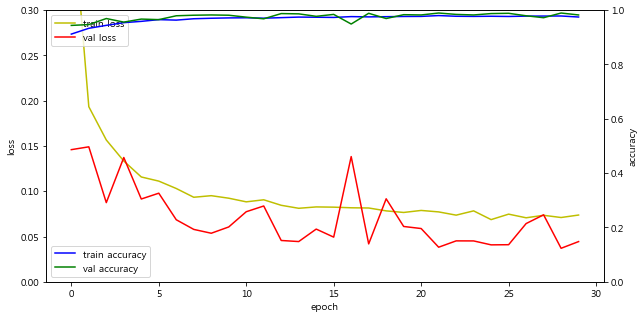

In [54]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()   # 오른쪽 y 축 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.3]) # 값을 반영하여 변경

# 오른쪽 y 축 설정
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1]) # 0.0, 1: 0 ~ 100 %, 정확도임으로 변경하지 않음

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차
acc_ax.set_ylabel('accuracy') # 정확도

loss_ax.legend(loc='upper left') # 오차 레이블 위치
acc_ax.legend(loc='lower left')  # 정확도 레이블 위치

plt.show()

In [55]:
# verbose=0: 처리과정의 메시지 생략, 1: 메시지 출력
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

손실값: 0.05792376771569252 /정확도: 99.07692074775696 %


In [56]:
model.save('./Wine1.h5')

In [57]:
model = load_model('./Wine1.h5')

In [58]:
p = model.predict(x_test[0:100])
print(p.shape)

(100, 1)


In [59]:
for i in range(len(x_test[0:100])):
    fmt = '실제값: {0}, 예측값: {1}'
    print(fmt.format(y_test[i], p[i]), end='')
    
    # 임계값의 지정, 정확도를 참고하여 판단, 60%이상 합격: 0.6
    if (p[i] >= 0.5): 
        print('--> Red 와인')   # 1
    else:
        print('--> White 와인') # 0

실제값: 0.0, 예측값: [3.314938e-07]--> White 와인
실제값: 0.0, 예측값: [1.6643385e-08]--> White 와인
실제값: 1.0, 예측값: [0.99228907]--> Red 와인
실제값: 0.0, 예측값: [0.00023958]--> White 와인
실제값: 1.0, 예측값: [0.9990704]--> Red 와인
실제값: 1.0, 예측값: [0.9960212]--> Red 와인
실제값: 0.0, 예측값: [0.00036326]--> White 와인
실제값: 0.0, 예측값: [0.0002152]--> White 와인
실제값: 0.0, 예측값: [0.4330002]--> White 와인
실제값: 0.0, 예측값: [0.00212356]--> White 와인
실제값: 1.0, 예측값: [0.99366033]--> Red 와인
실제값: 0.0, 예측값: [0.00180998]--> White 와인
실제값: 0.0, 예측값: [5.3129756e-05]--> White 와인
실제값: 1.0, 예측값: [0.99882686]--> Red 와인
실제값: 0.0, 예측값: [1.8416744e-05]--> White 와인
실제값: 0.0, 예측값: [0.00179428]--> White 와인
실제값: 0.0, 예측값: [0.00023812]--> White 와인
실제값: 1.0, 예측값: [0.967186]--> Red 와인
실제값: 0.0, 예측값: [5.8528516e-05]--> White 와인
실제값: 1.0, 예측값: [0.9995866]--> Red 와인
실제값: 0.0, 예측값: [2.2233104e-05]--> White 와인
실제값: 0.0, 예측값: [4.4155717e-05]--> White 와인
실제값: 0.0, 예측값: [3.8553026e-05]--> White 와인
실제값: 0.0, 예측값: [0.00021058]--> White 와인
실제값: 1.0, 예측값: [0.9963776]--> Red 와인
실